In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
#Importing Dataset
house_price = pd.read_csv('/content/Housing.csv')
house_price.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
house_price.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [4]:
house_price.shape

(545, 13)

In [5]:
#Checking Null Values
house_price.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [6]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [7]:
house_price.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

##Exploratory Data Analysis

In [10]:
#handling categorical columns
categorical = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

In [11]:
house_price[categorical]

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,yes,no,no,no,yes,yes
1,yes,no,no,no,yes,no
2,yes,no,yes,no,no,yes
3,yes,no,yes,no,yes,yes
4,yes,yes,yes,no,yes,no
...,...,...,...,...,...,...
540,yes,no,yes,no,no,no
541,no,no,no,no,no,no
542,yes,no,no,no,no,no
543,no,no,no,no,no,no


In [12]:
#Converting Categorical Variables into Numerical Variables
def conv_func(x):

    return x.map({'yes': 1, 'no': 0})

house_price[categorical] = house_price[categorical].apply(conv_func)
house_price[categorical]

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,1,0,0,0,1,1
1,1,0,0,0,1,0
2,1,0,1,0,0,1
3,1,0,1,0,1,1
4,1,1,1,0,1,0
...,...,...,...,...,...,...
540,1,0,1,0,0,0
541,0,0,0,0,0,0
542,1,0,0,0,0,0
543,0,0,0,0,0,0


In [13]:
dummy_col = pd.get_dummies(house_price['furnishingstatus'])
dummy_col.head()

,furnished,semi-furnished,unfurnished
0,True,False,False
1,True,False,False
2,False,True,False
3,True,False,False
4,True,False,False


In [14]:
dummy_col = pd.get_dummies(house_price['furnishingstatus'], drop_first = True)
dummy_col.head()

,semi-furnished,unfurnished
0,False,False
1,False,False
2,True,False
3,False,False
4,False,False


In [15]:
house_price = pd.concat([house_price, dummy_col], axis = 1)
house_price.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,False,False


In [16]:
house_price.drop(['furnishingstatus'], axis = 1, inplace = True)
house_price.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,False,False


##Splitting data into Training and Testing data

In [18]:
np.random.seed(0)
data_train, data_test = train_test_split(house_price, train_size = 0.7, test_size = 0.3, random_state = 100)

In [19]:
data_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,3710000,3600,3,1,1,1,0,0,0,0,1,0,False,True
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,True,False
159,5460000,3150,3,2,1,1,1,1,0,1,0,0,False,False
35,8080940,7000,3,2,4,1,0,0,0,1,2,0,False,False
28,8400000,7950,5,2,2,1,0,1,1,0,2,0,False,True


In [20]:
data_test.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,4403000,2880,3,1,2,1,0,0,0,0,0,1,True,False
54,7350000,6000,3,2,2,1,1,0,0,1,1,0,True,False
171,5250000,10269,3,1,1,1,0,0,0,0,1,1,True,False
244,4550000,5320,3,1,2,1,1,1,0,0,0,1,True,False
268,4382000,4950,4,1,2,1,0,0,0,1,0,0,True,False


In [21]:
scaler = MinMaxScaler()

In [22]:
col = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']

In [23]:
data_train[col] = scaler.fit_transform(data_train[col])

##model training

In [25]:
#model training
y_train = data_train.pop('price')
x_train = data_train

In [26]:
lin_model = LinearRegression()

In [27]:
lin_model.fit(x_train, y_train)

LinearRegression()

In [29]:
coeff = lin_model.coef_
print(coeff)

[ 0.23466354  0.04673453  0.19082319  0.10851563  0.05044144  0.03042826
  0.02159488  0.08486327  0.06688093  0.06073533  0.05942788  0.00092052
 -0.03100561]


In [30]:
score = lin_model.score(x_train, y_train)
print(score)

0.6814893088451202


In [31]:
#scaling test data
col_scale = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']
data_test[col_scale] = scaler.fit_transform(data_test[col_scale])

In [32]:
y_test = data_test.pop('price')
x_test = data_test

In [34]:
prediction = lin_model.predict(x_test)

In [35]:
#Checking R Square value
r2 = r2_score(y_test, prediction)
print(r2)

0.5995575338728529


In [36]:
#Comparing the actual and predicted values
y_test_metrics = y_test.values.reshape(-1,1)
df = pd.DataFrame({'actual ':y_test_metrics.flatten(), 'predicted ': prediction.flatten()})
df.head(10)

,actual,predicted
0,0.247651,0.202410
1,0.530201,0.374464
2,0.328859,0.305654
3,0.261745,0.293786
4,0.245638,0.258827
5,0.275168,0.189463
6,0.644295,0.499099
7,0.328859,0.297637
8,0.087248,0.122528
9,0.395973,0.316860


Text(0, 0.5, 'Predicted ')

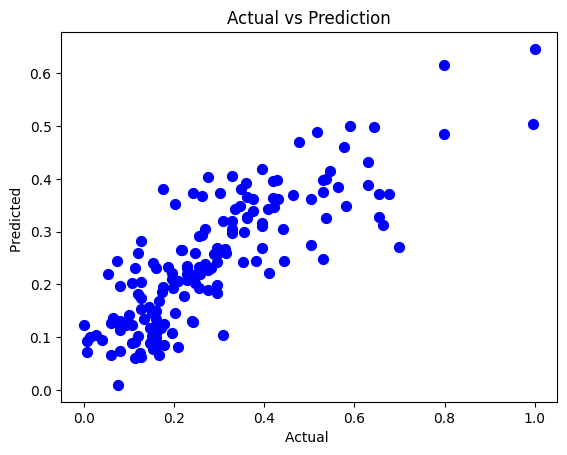

In [39]:
#Plotting the Graph
#Creating a new figure
fig = plt.figure()

# Scatter plot of actual verses predicted values
plt.scatter(y_test, prediction, c="blue", s=50, marker="o")

# Set the title and labels for the plot
plt.title('Actual vs Prediction')
plt.xlabel('Actual ', fontsize = 10)
plt.ylabel('Predicted ', fontsize = 10)

In [40]:
#Mean Squared Error

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, prediction)
print(" Mean Squared Error : ", mse)

 Mean Squared Error :  0.01445184009923834


In [41]:
from xgboost import XGBRegressor
# Initialize the XGBoost model
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=0)

# Train the XGBoost model
xgb_model.fit(x_train, y_train)

#make predicitons
xgb_pred = xgb_model.predict(x_test)

#r square and MSE
xgb_r2 = r2_score(y_test, xgb_pred)
print("XGBoost R^2 Score:", xgb_r2)

xgb_mse = mean_squared_error(y_test, xgb_pred)
print("XGBoost Mean Squared Error:", xgb_mse)

XGBoost R^2 Score: 0.30043237625790087
XGBoost Mean Squared Error: 0.02524717104732554


In [42]:
from sklearn.tree import DecisionTreeRegressor

#training decision tree model
DT_model = DecisionTreeRegressor(random_state =42)
DT_model.fit(x_train, y_train)

#make prediction
DT_prediction = DT_model.predict(x_test)

#r square and MSE
DT_mse = mean_squared_error(y_test, DT_prediction)
DT_r2 = r2_score(y_test, DT_prediction)


print("Mean Squared Error : ", DT_mse)
print("R Squared : ", DT_r2)

Mean Squared Error :  0.026799030018492542
R Squared :  0.25743229950446356


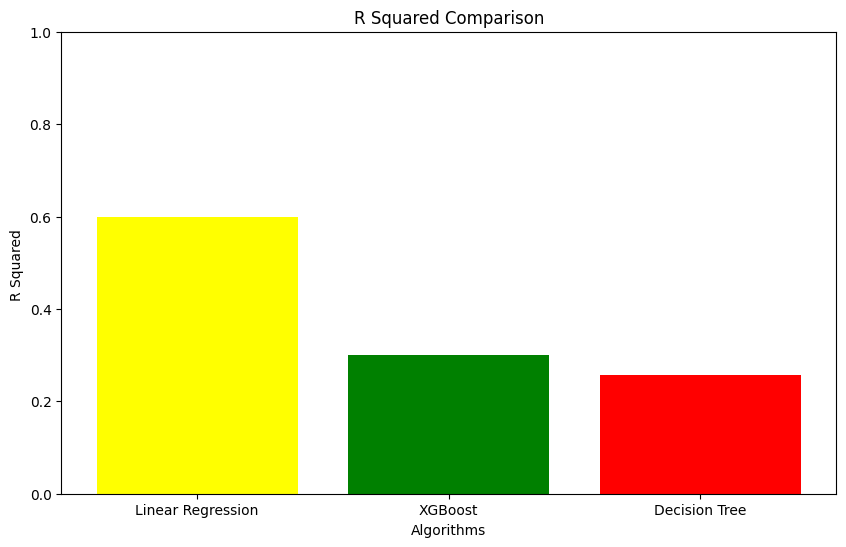

In [43]:
algorithms = ['Linear Regression', 'XGBoost', 'Decision Tree']
r2_scores = [r2, xgb_r2, DT_r2]

plt.figure(figsize = (10,6))
plt.bar(algorithms, r2_scores, color = ['yellow', 'green', 'red'])
plt.title('R Squared Comparison')
plt.xlabel('Algorithms', fontsize = 10)
plt.ylabel('R Squared ', fontsize = 10)
plt.ylim(0,1)
plt.show()

Linear Regression emerges as the optimal choice for this house price prediction project. It consistently outperforms XGBoost and Decision Tree models in terms of accuracy (lower MSE) and predictive power (higher R²). For further improvements, we can consider advanced techniques such as feature engineering, hyperparameter tuning, and ensemble methods to enhance model performance and robustness.